# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively

In [95]:
#import, clean and overview the data

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import math
warnings.filterwarnings('ignore') 

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [69]:
# Numeric data into dataframe
numerical = df.select_dtypes(np.number)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [70]:
# Categorical data into dataframe
categoricals = df.select_dtypes(object)
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


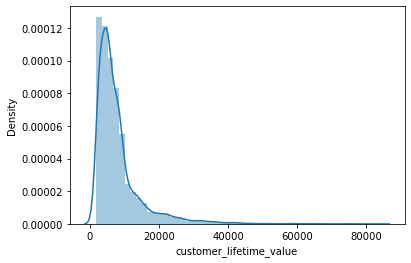

In [71]:
# customer_lifetime_value

sns.distplot(numerical['customer_lifetime_value'])
plt.show()

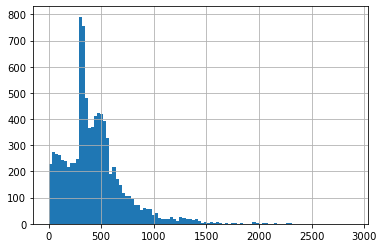

In [72]:
numerical['total_claim_amount'].hist(bins=100)
plt.show()

## failed to draw multiple plots....
I tried it as following but did not work

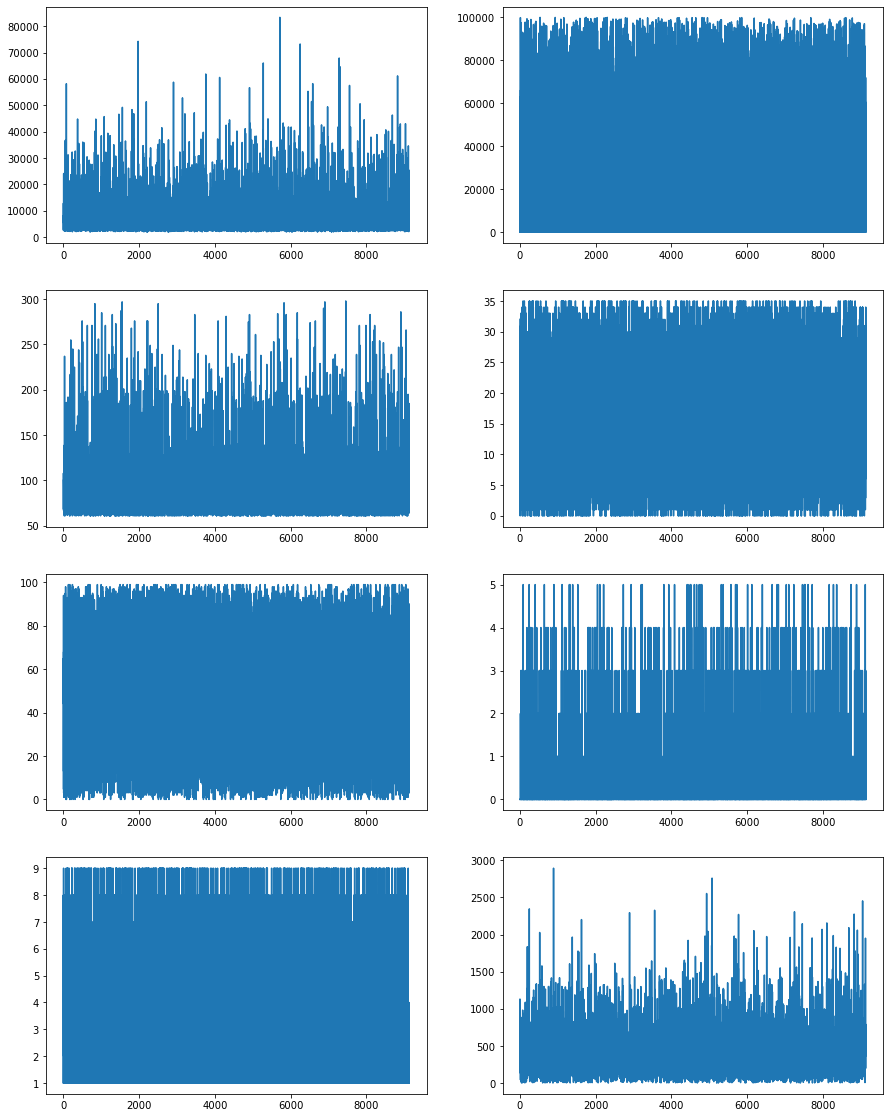

In [94]:
plt.figure(figsize=(15, 20))

# first plot 'customer_lifetime_value'
plt.subplot(4,2,1)
plt.plot(numerical['customer_lifetime_value'])

# second plot 'income'
plt.subplot(4,2,2)
plt.plot(numerical['income'])

# third plot 'monthly_premium_auto'
plt.subplot(4,2,3)
plt.plot(numerical['monthly_premium_auto'])

# forth plot 'months_since_last_claim'
plt.subplot(4,2,4)
plt.plot(numerical['months_since_last_claim'])

# fifth plot 'months_since_policy_inception'
plt.subplot(4,2,5)
plt.plot(numerical['months_since_policy_inception'])

# sixth plot 'number_of_open_complaints'
plt.subplot(4,2,6)
plt.plot(numerical['number_of_open_complaints'])

# seventh plot 'number_of_policies'
plt.subplot(4,2,7)
plt.plot(numerical['number_of_policies'])

# eigth plot 'total_claim_amount'
plt.subplot(4,2,8)
plt.plot(numerical['total_claim_amount'])

plt.show()

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [74]:
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:39:04   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [75]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


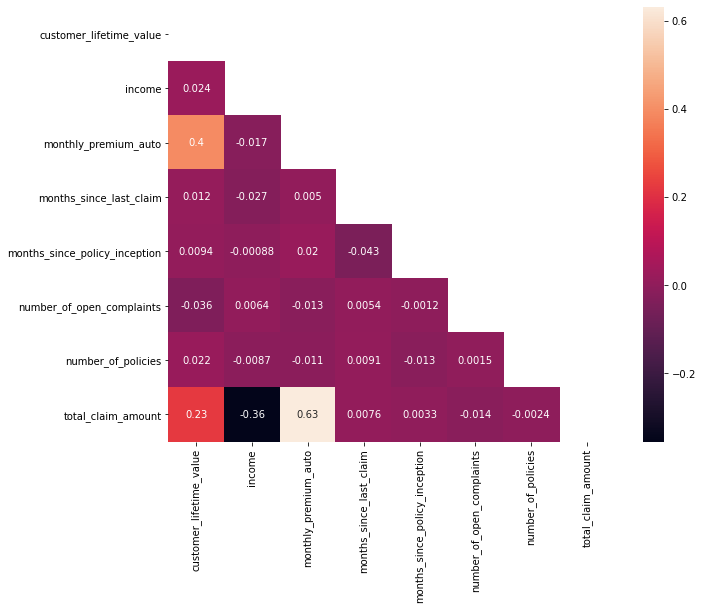

In [81]:
correlations_matrix = numerical.corr()
correlations_matrix

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)

plt.show()

## Conclusion 
There is no pair of future that have a correlation greater than 0.9